In [1]:
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.evaluation import evaluate_distance_metrics_and_clustering, machine_learning_evaluation
from orbit_generation.data import TSFeatureWiseScaler
from orbit_generation.dataset import get_first_period_dataset
from orbit_generation.stats import calculate_per_orbit_spatial_statistics

In [2]:
import torch
import numpy as np


# Import Data

In [3]:
data_path = r"/orbit-generation/data/orbits_fix_1500/EM_N_fix_1500.h5"
experiments_folder = "../experiments"
seq_len=100

In [4]:
data, orbit_df, labels, system_dict = get_first_period_dataset(file_path=data_path, segment_length=seq_len)
scaler = TSFeatureWiseScaler()        
scaled_data = scaler.fit_transform(torch.tensor(data, dtype=torch.float32))
scaled_data=scaled_data.numpy()
scaled_data = scaled_data[:,1:,:]
scaled_data.shape

(45211, 6, 100)

In [5]:
orbits_id_classes = np.array([orbit_df.at[index, 'id_class'] for index in labels])
orbits_id_classes.shape

(45211,)

# Analyze Distances

## Orbit Distances

All metrics and algorithms with 100 samples

In [6]:
num_samples = 100
indices = np.random.choice(len(data), num_samples, replace=False)

sampled_data = scaled_data[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_data, sampled_classes, evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

Computing euclidean distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


ValueError: Distance matrix 'X' must be symmetric.

All metrics and algorithms with 1k samples

In [ ]:
num_samples = 1000
indices = np.random.choice(len(data), num_samples, replace=False)

sampled_data = scaled_data[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_data, sampled_classes, evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

Evaluate 'euclidean' and 'kmeans' with all orbits

In [ ]:
distance_metrics=['euclidean']
clustering_algorithms=['kmeans']

In [ ]:
results = evaluate_distance_metrics_and_clustering(scaled_data, orbits_id_classes, distance_metrics=distance_metrics,
                                                   clustering_algorithms=clustering_algorithms, plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

## Feature Distances

In [ ]:
feature_names = ['period', 'jacobi', 'stability']
features = orbit_df[feature_names].values
features_3d = features.reshape(features.shape[0], features.shape[1], 1)
features_3d.shape

(45211, 3, 1)

Computing euclidean distances...


Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing manhattan distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing cosine distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...
Computing dtw distances...
Clustering with kmeans...
Clustering with gmm...
Clustering with dbscan...


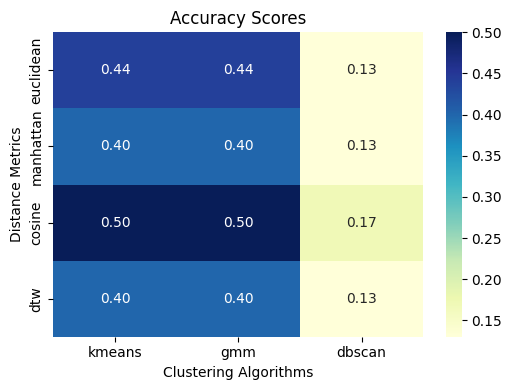

{'euclidean_kmeans': {'Accuracy': np.float64(0.44)}, 'euclidean_gmm': {'Accuracy': np.float64(0.44)}, 'euclidean_dbscan': {'Accuracy': np.float64(0.13)}, 'manhattan_kmeans': {'Accuracy': np.float64(0.4)}, 'manhattan_gmm': {'Accuracy': np.float64(0.4)}, 'manhattan_dbscan': {'Accuracy': np.float64(0.13)}, 'cosine_kmeans': {'Accuracy': np.float64(0.5)}, 'cosine_gmm': {'Accuracy': np.float64(0.5)}, 'cosine_dbscan': {'Accuracy': np.float64(0.17)}, 'dtw_kmeans': {'Accuracy': np.float64(0.4)}, 'dtw_gmm': {'Accuracy': np.float64(0.4)}, 'dtw_dbscan': {'Accuracy': np.float64(0.13)}}


In [ ]:
num_samples = 100
indices = np.random.choice(len(features_3d), num_samples, replace=False)

sampled_features = features_3d[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

In [ ]:
num_samples = 1000
indices = np.random.choice(len(features_3d), num_samples, replace=False)

sampled_features = features_3d[indices]
sampled_classes = orbits_id_classes[indices]

results = evaluate_distance_metrics_and_clustering(sampled_features, sampled_classes,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

In [ ]:
results = evaluate_distance_metrics_and_clustering(features_3d, orbits_id_classes, distance_metrics=distance_metrics,
                                                   clustering_algorithms=clustering_algorithms, plot_results=True,
                                                   evaluation_metrics=['Accuracy', 'V-Measure'])
print(results)

Computing euclidean distances...


# Family Prediction

## By Initial Conditions

In [ ]:
initial_conditions = scaled_data[:, :, 0]
initial_conditions.shape

(45211, 5, 1)

Input features reshaped to 2D for processing.


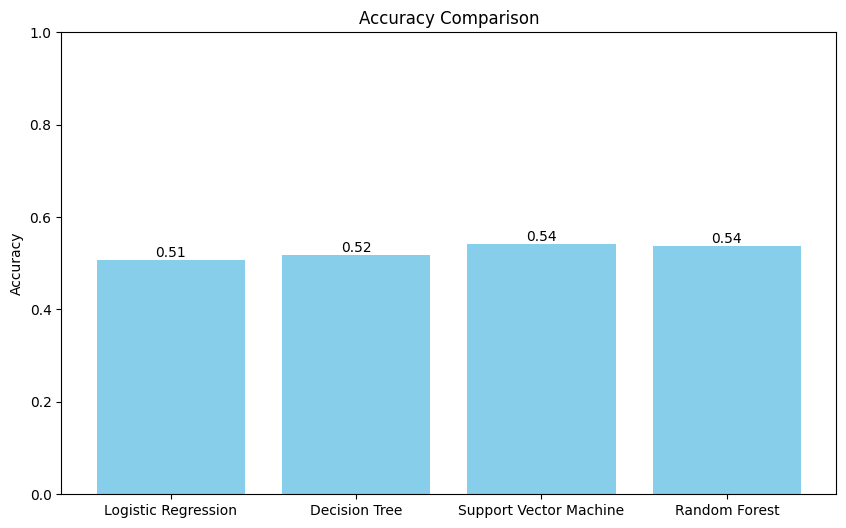

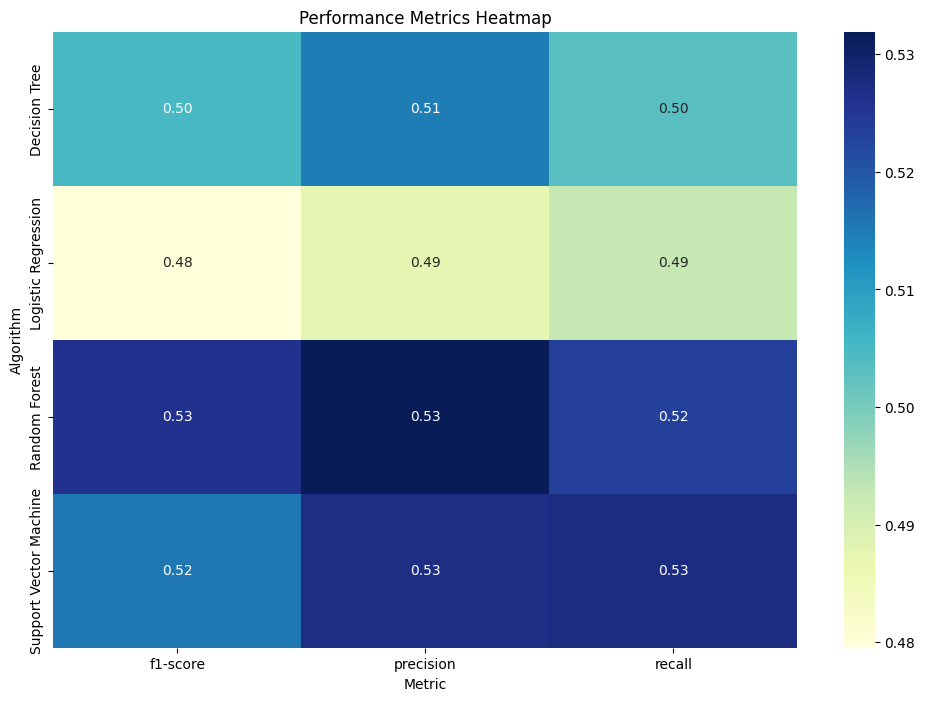

{'Logistic Regression': {'accuracy': 0.5062705978633518,
  'report': {'1.0': {'precision': 0.3262411347517731,
    'recall': 0.21296296296296297,
    'f1-score': 0.25770308123249297,
    'support': 1080.0},
   '2.0': {'precision': 0.35564853556485354,
    'recall': 0.1574074074074074,
    'f1-score': 0.21822849807445444,
    'support': 1080.0},
   '3.0': {'precision': 0.9051580698835274,
    'recall': 0.7721788502484032,
    'f1-score': 0.8333971658368441,
    'support': 1409.0},
   '4.0': {'precision': 0.0,
    'recall': 0.0,
    'f1-score': 0.0,
    'support': 1035.0},
   '5.0': {'precision': 0.027417746759720838,
    'recall': 0.049954586739327886,
    'f1-score': 0.035403926617315735,
    'support': 1101.0},
   '6.0': {'precision': 0.7621621621621621,
    'recall': 0.8005677785663591,
    'f1-score': 0.7808930425752856,
    'support': 1409.0},
   '7.0': {'precision': 0.8357963875205254,
    'recall': 0.8144,
    'f1-score': 0.8249594813614263,
    'support': 1250.0},
   '8.0': {'pr

In [ ]:
results = machine_learning_evaluation(initial_conditions, orbits_id_classes, print_results=True)

## By Grouped Spatial Coordinates

In [ ]:
position_stats = calculate_per_orbit_spatial_statistics(scaled_data)
position_stats.shape

(6, 6)

Error evaluating Logistic Regression: Found input variables with inconsistent numbers of samples: [6, 45211]
Error evaluating Decision Tree: Found input variables with inconsistent numbers of samples: [6, 45211]
Error evaluating Support Vector Machine: Found input variables with inconsistent numbers of samples: [6, 45211]
Error evaluating Random Forest: Found input variables with inconsistent numbers of samples: [6, 45211]


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

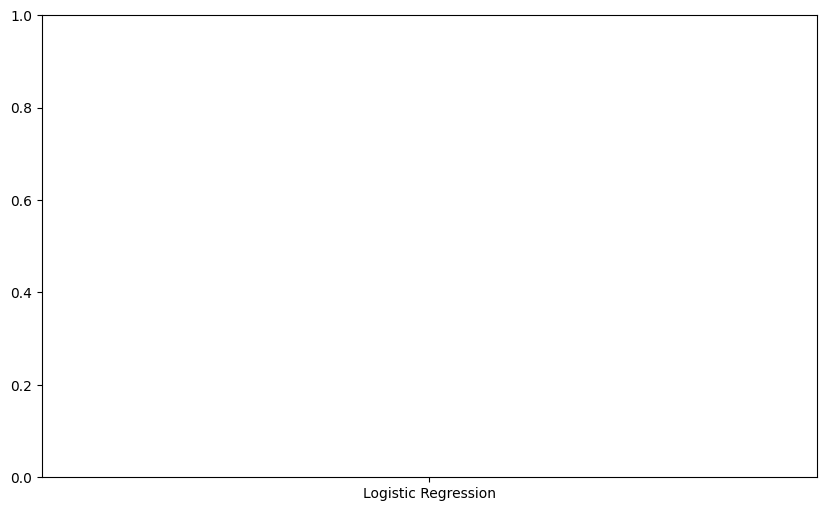

In [ ]:
results = machine_learning_evaluation(position_stats, orbits_id_classes, print_results=True)

## By Features

In [ ]:
features.shape

(45211, 3)

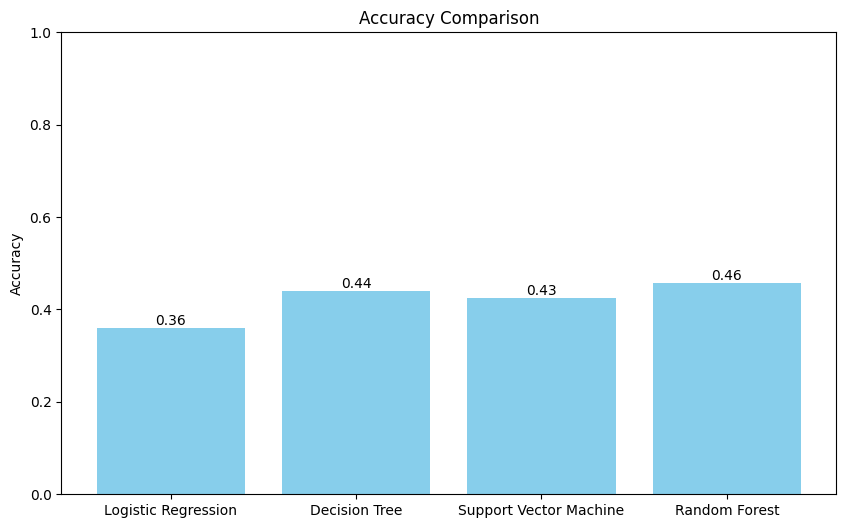

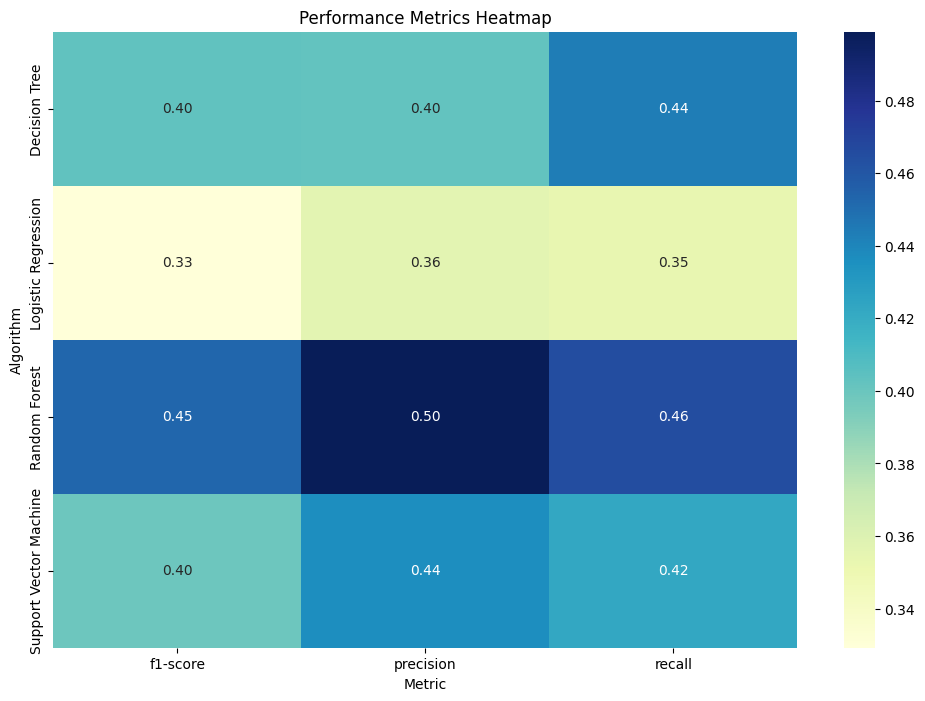

{'Logistic Regression': {'accuracy': 0.35896131472429277,
  'report': {'1.0': {'precision': 0.1843817787418655,
    'recall': 0.1574074074074074,
    'f1-score': 0.16983016983016982,
    'support': 1080.0},
   '2.0': {'precision': 0.12482269503546099,
    'recall': 0.08148148148148149,
    'f1-score': 0.09859943977591036,
    'support': 1080.0},
   '3.0': {'precision': 0.4043062200956938,
    'recall': 0.5997161107168204,
    'f1-score': 0.48299514146899114,
    'support': 1409.0},
   '4.0': {'precision': 0.006381039197812215,
    'recall': 0.00676328502415459,
    'f1-score': 0.006566604127579738,
    'support': 1035.0},
   '5.0': {'precision': 0.07120743034055728,
    'recall': 0.04178019981834696,
    'f1-score': 0.05266170578133944,
    'support': 1101.0},
   '6.0': {'precision': 0.5,
    'recall': 0.40028388928317954,
    'f1-score': 0.4446196294836421,
    'support': 1409.0},
   '7.0': {'precision': 0.6551362683438156,
    'recall': 1.0,
    'f1-score': 0.7916402786573781,
    's

In [ ]:
results = machine_learning_evaluation(features, orbits_id_classes, print_results=True)